## Titanic Survival Prediction

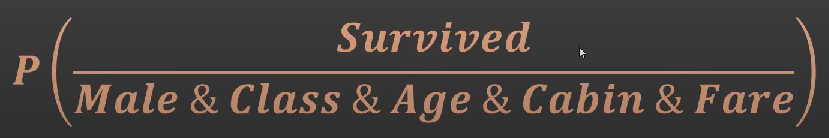

#### What is naive?
- Assumption that features such as gender, class, age, cabin, fare ... are `independent` of each other

In [5]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


### Data Engineering

In [6]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Cabin'], axis ='columns', inplace = True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [7]:
target = df.Survived
inputs = df.drop('Survived',axis = 'columns')

In [8]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [9]:
inputs = pd.concat([inputs, dummies], axis = 'columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [11]:
inputs = inputs.drop('Sex',axis = 'columns')
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [12]:
inputs.columns[inputs.isna().any()]
#shows that Age is the only column with na values

Index(['Age'], dtype='object')

In [14]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [15]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [17]:
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(inputs, target, test_size=0.2)

In [22]:
len(X_train)

712

In [23]:
len(X_test)

179

### Model Training

In [24]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [25]:
model.fit(X_train, y_train)

GaussianNB()

In [26]:
model.score(X_test, y_test)

0.776536312849162

In [27]:
y_test[:10]

439    0
741    0
563    0
34     0
880    1
80     0
507    1
361    0
362    0
390    1
Name: Survived, dtype: int64

In [29]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
model.predict_proba(X_test[:10])

array([[0.98192913, 0.01807087],
       [0.75530679, 0.24469321],
       [0.99136331, 0.00863669],
       [0.70868421, 0.29131579],
       [0.03140482, 0.96859518],
       [0.98999426, 0.01000574],
       [0.93417967, 0.06582033],
       [0.98031082, 0.01968918],
       [0.07235358, 0.92764642],
       [0.16634157, 0.83365843]])